In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn models
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
#from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
#from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, accuracy_score
#from sklearn.feature_selection import RFE
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer

from lightgbm import LGBMClassifier

# FUNCTIONS

In [2]:
# Examine missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# LOAD THE DATA

In [3]:
# Training data
app_train = pd.read_csv('/home/convidado/Denise/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Test data
app_test = pd.read_csv('/home/convidado/Denise/application_test.csv')
print('Test data shape: ', app_test.shape)
app_test.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# EXAMINE DATA

# Check the distribution of the target colum. "0" represents paid loand and "1" represents unpaid loans

-----------------------Target Column------------------------------
0    282686
1     24825
Name: TARGET, dtype: int64


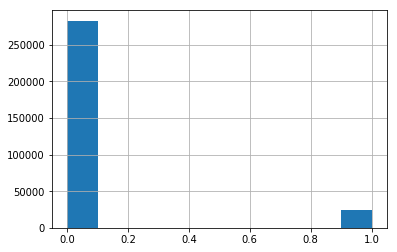

In [5]:
# Distribution of the Target Column

print("-----------------------Target Column------------------------------")
print(app_train['TARGET'].value_counts())
app_train['TARGET'].astype(int).hist()



# Check missing values

In [6]:
print("-----------------------Missing Values------------------------------")
missing_values = missing_values_table(app_train)
missing_values.head(20)

-----------------------Missing Values------------------------------
Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


# Check how many "objects" and the unique classes in each object column

In [7]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Change categorical values

In [9]:
# Two or few categories
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

app_train.head()

3 columns were label encoded.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [11]:
# Align train and test datasets

train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


# Check some anomallies

In [12]:
# Check anomalies

print((app_train['DAYS_BIRTH'] / -365).describe())

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('\nThe non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5,0,'Days Employment')

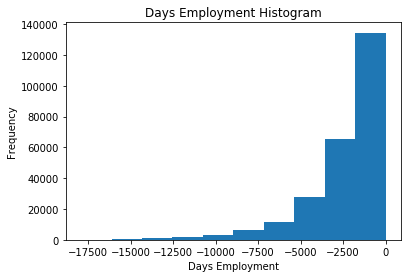

In [13]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')



In [14]:
# Anomalies in the test_set
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


# FEATURE ENGINEERING

In [112]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [114]:
# Most negative correlations: EXT1, EXT2, EXT3
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


# Percentage of the credit amount relative to a client's income

In [15]:
# Get the percentage

app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']

app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,1,0,1,0,1,False,2.007889
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0,1,0,0,False,4.790750
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,False,2.000000
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,False,2.316167
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,False,4.222222


#  Percentage of the loan annuity relative to a client's income

In [16]:
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']

app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,1,0,1,0,1,False,2.007889,0.121978
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,1,0,0,False,4.790750,0.132217
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,False,2.000000,0.100000
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,False,2.316167,0.219900
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,False,4.222222,0.179963


# Length of the payment in months (since the annuity is the monthly amount due

In [17]:
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']

app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,1,0,1,0,1,False,2.007889,0.121978,0.060749
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,1,0,0,False,4.790750,0.132217,0.027598
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,False,2.000000,0.100000,0.050000
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,False,2.316167,0.219900,0.094941
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,False,4.222222,0.179963,0.042623


# Percentage of the days employed relative to the client's age

In [18]:
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1,0,1,0,1,False,2.007889,0.121978,0.060749,0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,1,0,0,False,4.790750,0.132217,0.027598,0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,0.152418


# SAVE DATASETS

In [120]:
# Save datasets
# Save the CSV
#app_train.to_csv('/home/convidado/Denise/app_train_feat.csv', index = True)
#app_test.to_csv('/home/convidado/Denise/app_test_feat.csv', index = True)


In [121]:
# Choose delect columns with number of NaN >=60
#print("-----------------------Missing Values------------------------------")
#missing_values = missing_values_table(app_train)

#missing_values.loc[missing_values['% of Total Values'] >= 60].index



In [122]:
# Define final train and test datasets
# Define train features and train targets 

#app_train_target = app_train["TARGET"]

#app_train = app_train.drop(columns = ['TARGET', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG',
#       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
#       'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI',
#       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MEDI',
#       'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_AVG',
#       'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE'])

#app_test = app_test.drop(columns  = ['COMMONAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG',
#       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
#       'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI',
#       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MEDI',
#       'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_AVG',
#       'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE'])


# Print out the new shapes
#print('Training final dataset shape: ', app_train.shape)
#print('Training final target shape:  ', app_train_target.shape)
#print('Testfinal dataset shape:  ', app_test.shape)


In [19]:
app_train_target = app_train["TARGET"]

app_train = app_train.drop(columns = ['TARGET'])

# Print out the new shapes
print('Training final dataset shape: ', app_train.shape)
print('Training final target shape:  ', app_train_target.shape)
print('Testfinal dataset shape:  ', app_test.shape)

Training final dataset shape:  (307511, 244)
Training final target shape:   (307511,)
Testfinal dataset shape:   (48744, 244)


In [31]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,1,0,1,0,False,2.007889,0.121978,0.060749,0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,1,0,False,4.790750,0.132217,0.027598,0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,0.152418


# ADD BUREAU_DATA_FEAT

In [32]:
# Load bureau_data_feat
bureau_data = pd.read_csv('/home/convidado/Denise/14_07_bureau_balance_previous_app_pos_cash_credit_card (copy)/bureau_agg.csv')
bureau_data = bureau_data.drop(columns= ["Unnamed: 0"])
print('Training data shape: ', bureau_data.shape)
bureau_data.head()

Training data shape:  (305811, 244)


,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_STATUS_X_min,bureau_STATUS_X_sum,bureau_STATUS_nan_count,bureau_STATUS_nan_mean,bureau_STATUS_nan_max,bureau_STATUS_nan_min,bureau_STATUS_nan_sum,bureau_DEBT_CREDIT_RATIO,bureau_OVERDUE_DEBIT_RATIO,DAYS_DIFF
0,100001,172,-1009.284884,-49,-1572,-173597,172,0.0,0,0,...,0,30.0,172,0.0,0,0,0,0.147934,0.0,0.0
1,100002,110,-996.781818,-103,-1437,-109646,110,0.0,0,0,...,0,15.0,110,0.0,0,0,0,0.320947,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,0,0.0,4,1.0,1,1,4,0.000000,NaN,515.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,0,0.0,2,1.0,1,1,2,0.000000,NaN,459.0
4,100005,21,-272.380952,-62,-373,-5720,21,0.0,0,0,...,0,2.0,21,0.0,0,0,0,0.755662,0.0,0.0


In [33]:
# Fill inf columns
bureau_data = bureau_data.replace(np.inf,0)
bureau_data = bureau_data.replace(-np.inf,0)

In [34]:
# Merge datasets

app_train_bureau = app_train.merge(bureau_data, on = ["SK_ID_CURR"], how = "left")
app_test_bureau = app_test.merge(bureau_data, on = ["SK_ID_CURR"], how = "left")

print('Training data new shape: ', app_train_bureau.shape)

print('Training data new shape: ', app_test_bureau.shape)

Training data new shape:  (307511, 487)
Training data new shape:  (48744, 487)


In [35]:
# Normalization and fill missing values

# Copy of the testing data
test = app_test_bureau.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to unit scale (mean = 0 and variance = 1)
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(app_train_bureau)

# Transform both training and testing data
train = imputer.transform(app_train_bureau)
test = imputer.transform(app_test_bureau)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 487)
Testing data shape:  (48744, 487)


In [36]:
# Light Gradient Boosting Descendent

#d_train = lgb.Dataset(train, label=app_train_target)

lg = LGBMClassifier(n_estimators=200,
    learning_rate=0.1,
    num_leaves=123,
    colsample_bytree=0.8,
    subsample=0.9,
    max_depth=15,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    min_child_weight=2 )

lg.fit(train,app_train_target)

#Prediction
y_pred = lg.predict(train)

#convert into binary values
for i in range(0,99):
    if y_pred[i] >= .5:  
        y_pred[i]=1
    else:
        y_pred[i]=0
        
accuracy = accuracy_score(y_pred,app_train_target)
print(accuracy)

0.9324902198620537


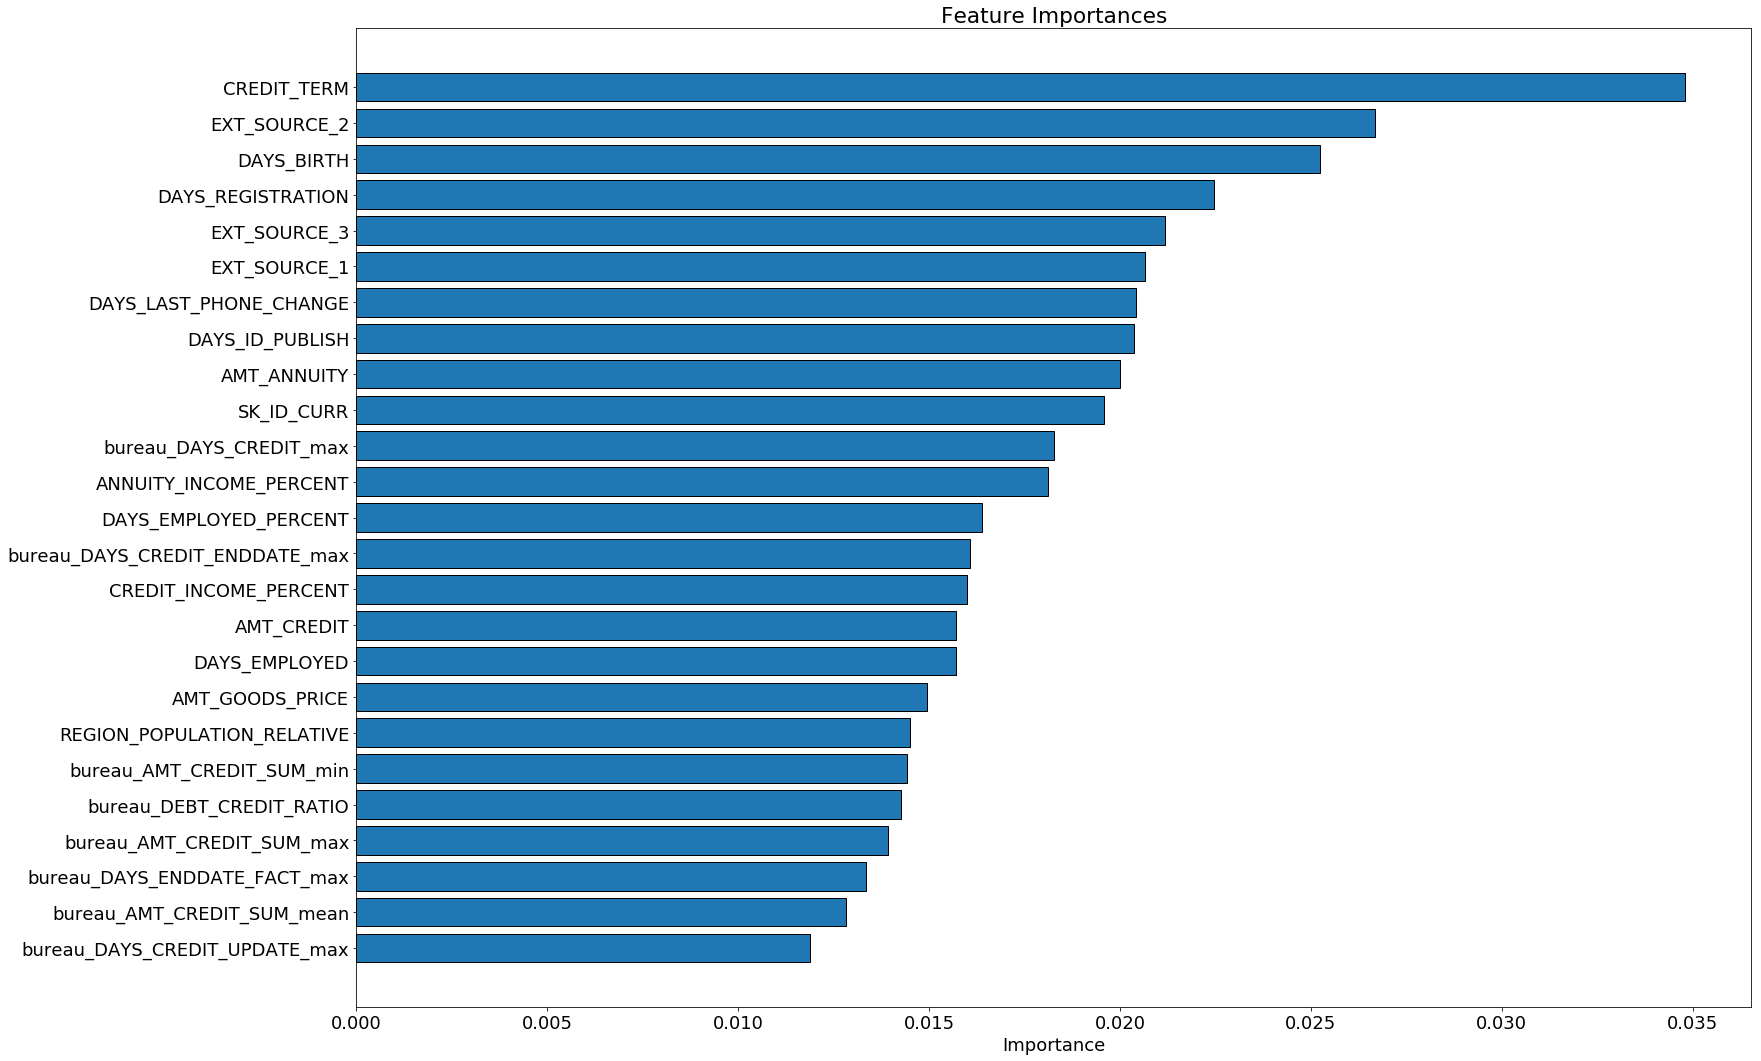

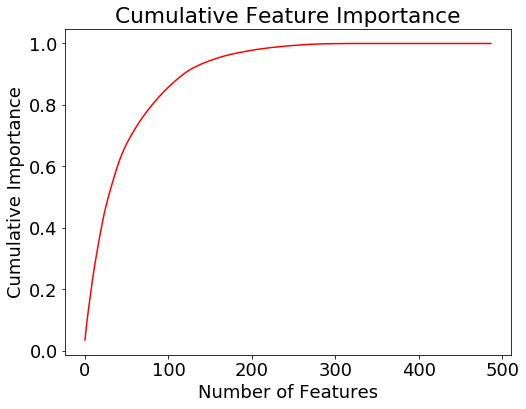

119 features required for 0.90 of cumulative importance


In [37]:
# Get the 15 features more important
feature_importances = lg.feature_importances_

feature_importances = pd.DataFrame({'feature': list(app_train_bureau.columns), 'importance': \
                                    feature_importances}).sort_values('importance', ascending = False)

def plot_feature_importances(df, threshold = 0.9):
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (25, 18))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:25]))), 
            df['importance_normalized'].head(25), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:25]))))
    ax.set_yticklabels(df['feature'].head(25))
    
    # Plot labeling
    plt.xlabel('Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

norm_feature_importances = plot_feature_importances(feature_importances)

In [38]:
# Get the features with zero importance

zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])

print('There are %d features with 0.0 importance' % len(zero_features))

feature_importances[feature_importances['importance'] == 0.0]['feature'].head()

There are 174 features with 0.0 importance


197                   ORGANIZATION_TYPE_Mobile
192                ORGANIZATION_TYPE_Insurance
202                 ORGANIZATION_TYPE_Religion
422            bureau_CREDIT_TYPE_Mortgage_min
428    bureau_CREDIT_TYPE_Real estate loan_sum
Name: feature, dtype: object

In [39]:
# Drop features with zero importance
app_train_bureau_drop = app_train_bureau.drop(columns = zero_features)
app_test_bureau_drop = app_test_bureau.drop(columns = zero_features)

app_train_bureau_drop.shape

(307511, 313)

In [40]:
del app_train_bureau, app_test_bureau

# LOAD DATASET

In [41]:
# Load previous_app_feat
previous_app_feat = pd.read_csv('/home/convidado/Denise/14_07_bureau_balance_previous_app_pos_cash_credit_card (copy)/previous_app_feat_agg.csv')
previous_app_feat = previous_app_feat.drop(columns= ["Unnamed: 0"])
print('Training data shape: ', previous_app_feat.shape)
previous_app_feat.head()

Training data shape:  (338857, 395)


,SK_ID_CURR,previous_app_AMT_ANNUITY_count,previous_app_AMT_ANNUITY_mean,previous_app_AMT_ANNUITY_max,previous_app_AMT_ANNUITY_min,previous_app_AMT_ANNUITY_sum,previous_app_AMT_APPLICATION_count,previous_app_AMT_APPLICATION_mean,previous_app_AMT_APPLICATION_max,previous_app_AMT_APPLICATION_min,...,cc_balance_NAME_CONTRACT_STATUS_Signed_min,cc_balance_NAME_CONTRACT_STATUS_Signed_sum,cc_balance_NAME_CONTRACT_STATUS_nan_count,cc_balance_NAME_CONTRACT_STATUS_nan_mean,cc_balance_NAME_CONTRACT_STATUS_nan_max,cc_balance_NAME_CONTRACT_STATUS_nan_min,cc_balance_NAME_CONTRACT_STATUS_nan_sum,RATIO_PAYMENT_INSTALL_MIN,RATIO_PAY_CURR_PAY_TOTAL,RATIO_RECEIVABLE_TOTAL_RECEIVABLE
0,100001,1,3951.000,3951.000,3951.000,3951.000,1,24835.50,24835.5,24835.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,1,9251.775,9251.775,9251.775,9251.775,1,179055.00,179055.0,179055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,3,56553.990,98356.995,6737.310,169661.970,3,435436.50,900000.0,68809.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,1,5357.250,5357.250,5357.250,5357.250,1,24282.00,24282.0,24282.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,1,4813.200,4813.200,4813.200,4813.200,2,22308.75,44617.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Merge datasets
app_train_previous = app_train_bureau_drop.merge(previous_app_feat, on = ["SK_ID_CURR"], how = "left")
app_test_previous = app_test_bureau_drop.merge(previous_app_feat, on = ["SK_ID_CURR"], how = "left")

print('Training data new shape: ', app_train_previous.shape)

print('Test data new shape: ', app_test_previous.shape)

Training data new shape:  (307511, 707)
Test data new shape:  (48744, 707)


In [43]:
del app_train_bureau_drop, app_test_bureau_drop

# LOAD DATA

In [47]:
# Load previous_app_feat
installments_feat = pd.read_csv('/home/convidado/Denise/14_07_bureau_balance_previous_app_pos_cash_credit_card (copy)/installments_agg.csv')
installments_feat = installments_feat.drop(columns= ["Unnamed: 0"])
print('Training data shape: ', installments_feat.shape)
installments_feat.head()

Training data shape:  (339587, 33)


,SK_ID_CURR,installments_payment_NUM_INSTALMENT_VERSION_count,installments_payment_NUM_INSTALMENT_VERSION_mean,installments_payment_NUM_INSTALMENT_VERSION_max,installments_payment_NUM_INSTALMENT_VERSION_min,installments_payment_NUM_INSTALMENT_VERSION_sum,installments_payment_NUM_INSTALMENT_NUMBER_count,installments_payment_NUM_INSTALMENT_NUMBER_mean,installments_payment_NUM_INSTALMENT_NUMBER_max,installments_payment_NUM_INSTALMENT_NUMBER_min,...,installments_payment_AMT_INSTALMENT_max,installments_payment_AMT_INSTALMENT_min,installments_payment_AMT_INSTALMENT_sum,installments_payment_AMT_PAYMENT_count,installments_payment_AMT_PAYMENT_mean,installments_payment_AMT_PAYMENT_max,installments_payment_AMT_PAYMENT_min,installments_payment_AMT_PAYMENT_sum,installments_payments_PAYMENT_INSTALMENT_RATIO,installments_payments_MEDIAN_DIFF_PAYMENTS_INSTALLMENT
0,100001,7,1.142857,2.0,1.0,8.0,7,2.714286,4,1,...,17397.900,3951.000,41195.925,7,5885.132143,17397.900,3951.000,41195.925,1.0,-6.0
1,100002,19,1.052632,2.0,1.0,20.0,19,10.000000,19,1,...,53093.745,9251.775,219625.695,19,11559.247105,53093.745,9251.775,219625.695,1.0,-19.0
2,100003,25,1.040000,2.0,1.0,26.0,25,5.080000,12,1,...,560835.360,6662.970,1618864.650,25,64754.586000,560835.360,6662.970,1618864.650,1.0,-6.0
3,100004,3,1.333333,2.0,1.0,4.0,3,2.000000,3,1,...,10573.965,5357.250,21288.465,3,7096.155000,10573.965,5357.250,21288.465,1.0,-9.0
4,100005,9,1.111111,2.0,1.0,10.0,9,5.000000,9,1,...,17656.245,4813.200,56161.845,9,6240.205000,17656.245,4813.200,56161.845,1.0,-29.0


In [48]:
# Merge datasets
app_train_previous = app_train_previous.merge(installments_feat, on = ["SK_ID_CURR"], how = "left")
app_test_previous = app_test_previous.merge(installments_feat, on = ["SK_ID_CURR"], how = "left")

print('Training data new shape: ', app_train_previous.shape)

print('Test data new shape: ', app_test_previous.shape)

Training data new shape:  (307511, 739)
Test data new shape:  (48744, 739)


In [49]:
del installments_feat

In [51]:
# Fill inf columns
app_train_previous = app_train_previous.replace(np.inf,0)
app_test_previous = app_test_previous.replace(-np.inf,0)

# FINAL FEATURES

In [52]:
# Normalization and fill missing values

# Copy of the testing data
test = app_test_previous.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to unit scale (mean = 0 and variance = 1)
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(app_train_previous)

# Transform both training and testing data
train = imputer.transform(app_train_previous)
test = imputer.transform(app_test_previous)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 739)
Testing data shape:  (48744, 739)


# MACHINE LEARNING MODELS

In [53]:
# Light Gradient Boosting Descendent

#d_train = lgb.Dataset(train, label=app_train_target)

lg = LGBMClassifier(n_estimators=200,
    learning_rate=0.1,
    num_leaves=123,
    colsample_bytree=0.8,
    subsample=0.9,
    max_depth=15,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    min_child_weight=2 )

lg.fit(train,app_train_target)

#Prediction
y_pred = lg.predict(train)

#convert into binary values
for i in range(0,99):
    if y_pred[i] >= .5:  
        y_pred[i]=1
    else:
        y_pred[i]=0
        
accuracy = accuracy_score(y_pred,app_train_target)
print(accuracy)

0.9375436976238248


# GET THE FEATURE IMPORTANCE

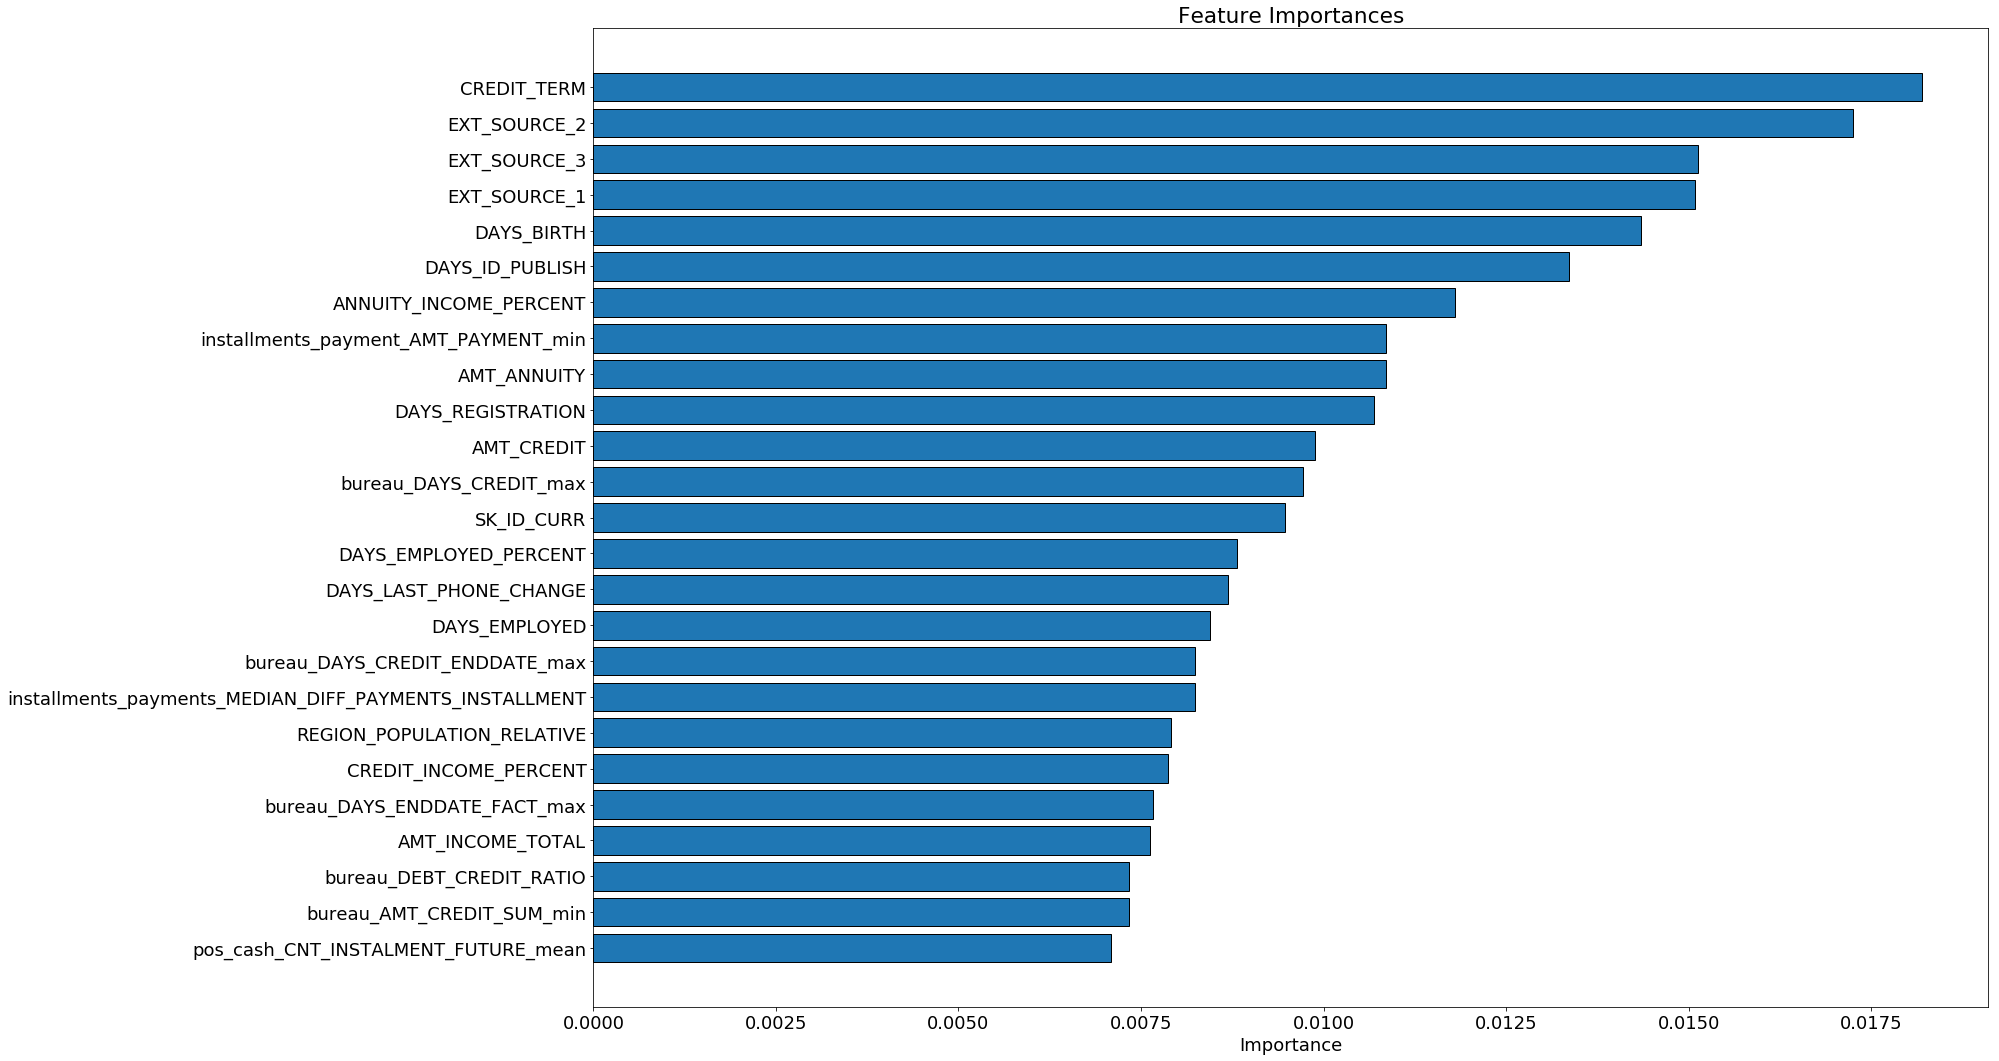

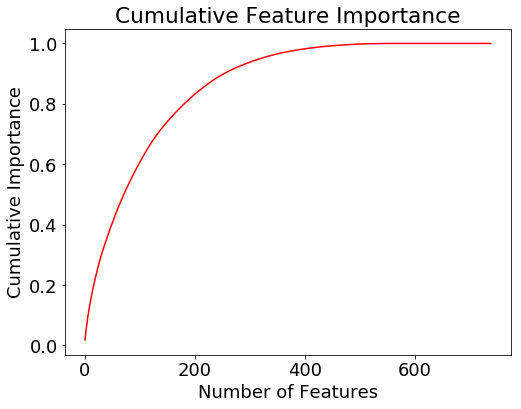

254 features required for 0.90 of cumulative importance


In [58]:
# Get the 15 features more important
feature_importances = lg.feature_importances_

feature_importances = pd.DataFrame({'feature': list(app_train_previous.columns), 'importance': \
                                    feature_importances}).sort_values('importance', ascending = False)

def plot_feature_importances(df, threshold = 0.9):
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (25, 18))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:25]))), 
            df['importance_normalized'].head(25), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:25]))))
    ax.set_yticklabels(df['feature'].head(25))
    
    # Plot labeling
    plt.xlabel('Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

norm_feature_importances = plot_feature_importances(feature_importances)

# Get the features with null importance

In [55]:
# Get the features with zero importance

zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])

print('There are %d features with 0.0 importance' % len(zero_features))

feature_importances[feature_importances['importance'] == 0.0]['feature'].head()

There are 198 features with 0.0 importance


178          ORGANIZATION_TYPE_Trade: type 3
624    cc_balance_AMT_TOTAL_RECEIVABLE_count
176                ORGANIZATION_TYPE_Telecom
177          ORGANIZATION_TYPE_Trade: type 1
654                  cc_balance_SK_DPD_count
Name: feature, dtype: object

# SUBMISSION

In [56]:
# Get the submission
proba_grad = lg.predict_proba(test)[:, 1]

submit_grad = app_test_previous[['SK_ID_CURR']]
submit_grad['TARGET'] = proba_grad

submit_grad.head()

,SK_ID_CURR,TARGET
0,100001,0.014768
1,100005,0.126559
2,100013,0.006190
3,100028,0.018308
4,100038,0.165231


In [57]:
# Save the submission to a csv file
submit_grad.to_csv('/home/convidado/Denise/14_07_bureau_balance_previous_app_pos_cash_credit_card (copy)/14_07_all_features_dropzero_all_datasets.csv', index = False)


# SOME DATA VISUALIZATION

In [67]:
# Most important features
ten_plus_important_features = list(feature_importances.head(10)["feature"])

ten_plus_important_features

['CREDIT_TERM',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'ANNUITY_INCOME_PERCENT',
 'installments_payment_AMT_PAYMENT_min',
 'AMT_ANNUITY',
 'DAYS_REGISTRATION']

In [69]:
# Return the target column
app_train_previous["TARGET"] = app_train_target

app_train_previous.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,installments_payment_AMT_INSTALMENT_min,installments_payment_AMT_INSTALMENT_sum,installments_payment_AMT_PAYMENT_count,installments_payment_AMT_PAYMENT_mean,installments_payment_AMT_PAYMENT_max,installments_payment_AMT_PAYMENT_min,installments_payment_AMT_PAYMENT_sum,installments_payments_PAYMENT_INSTALMENT_RATIO,installments_payments_MEDIAN_DIFF_PAYMENTS_INSTALLMENT,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,9251.775,219625.695,19.0,11559.247105,53093.745,9251.775,219625.695,1.0,-19.0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,6662.970,1618864.650,25.0,64754.586000,560835.360,6662.970,1618864.650,1.0,-6.0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,5357.250,21288.465,3.0,7096.155000,10573.965,5357.250,21288.465,1.0,-9.0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,2482.920,1007153.415,16.0,62947.088438,691786.890,2482.920,1007153.415,1.0,-6.0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,1821.780,835985.340,66.0,12214.060227,22678.785,0.180,806127.975,1.0,-2.0,0


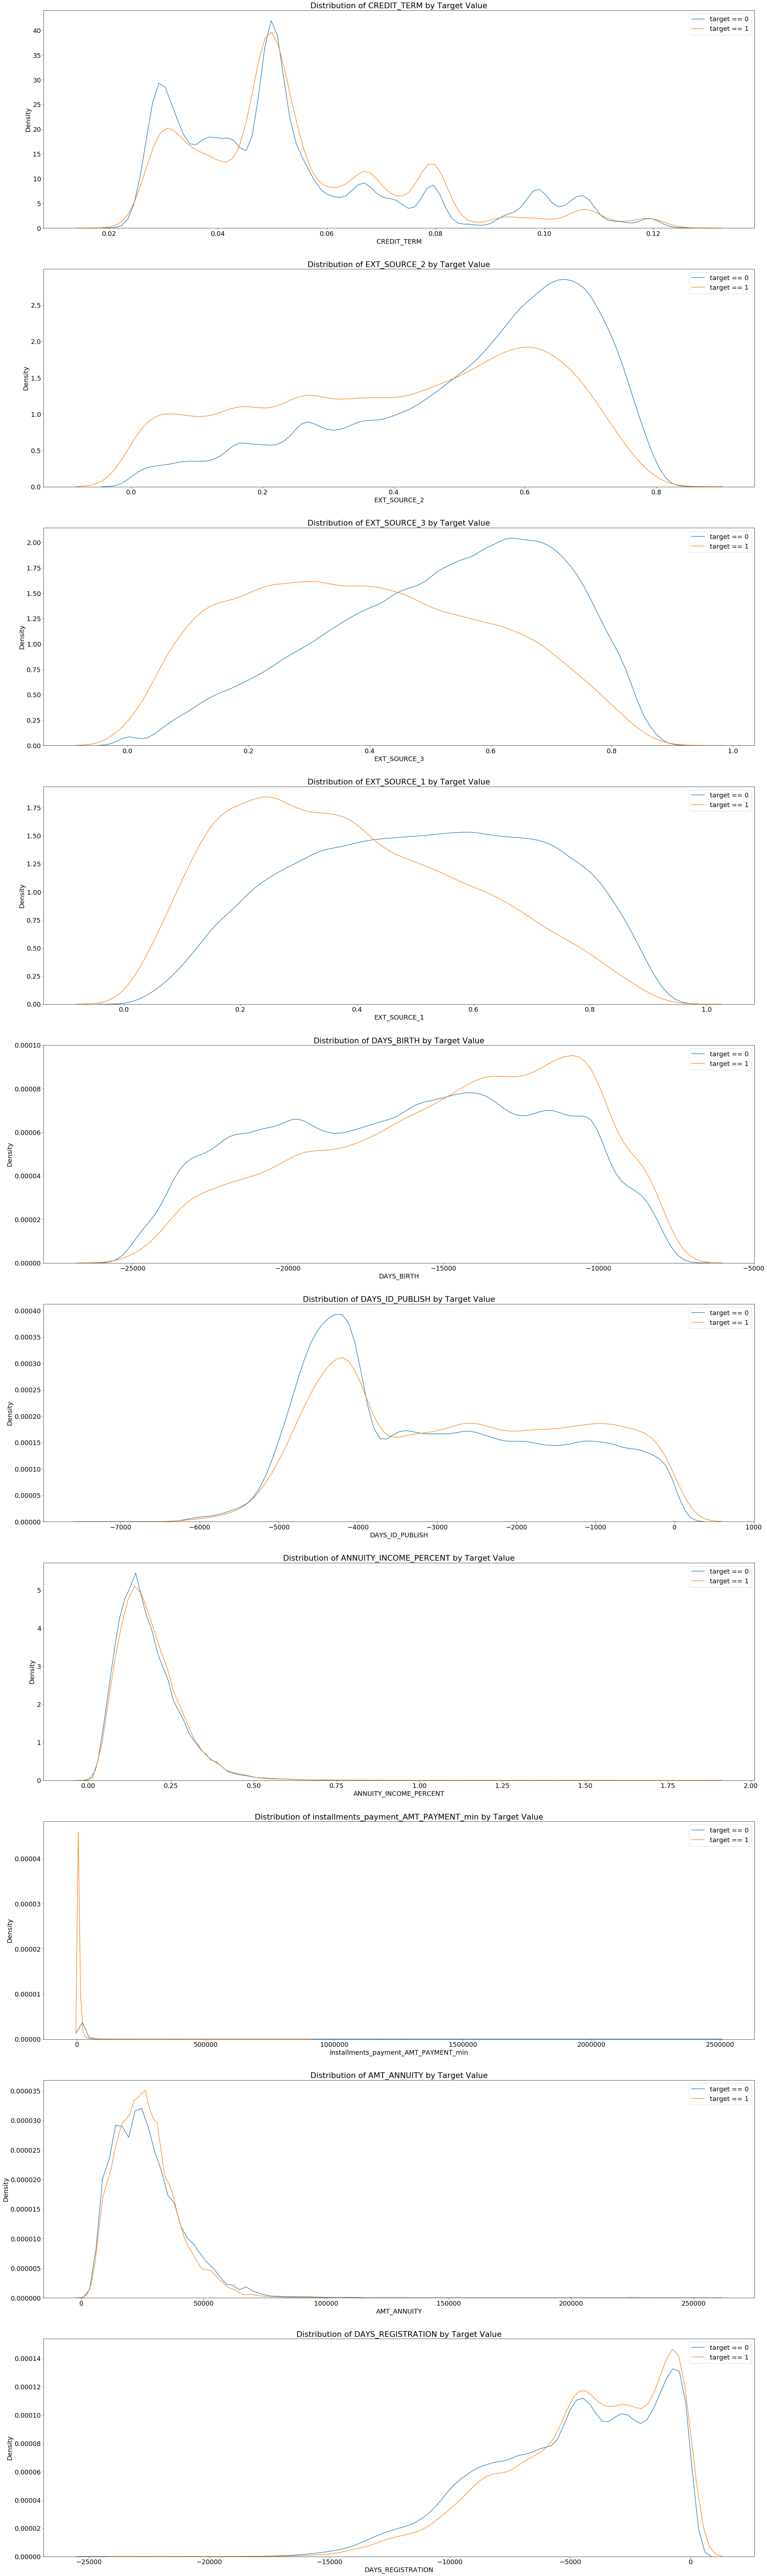

In [87]:
# Get the distributions
plt.figure(figsize = (30, 100))

# iterate through the sources
for i, source in enumerate(ten_plus_important_features):
    
    # create a new subplot for each source
    plt.subplot(10, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_previous.loc[app_train_previous['TARGET'] == 0, source].dropna(), label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_previous.loc[app_train_previous['TARGET'] == 1, source].dropna(), label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)